In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

print(pd.__version__)

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')

# Convert dataset to pandas DataFrame
df = dataset['train'].to_pandas()

# Data Clean Up
# Change string to datetime ('job_posted_date' column)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Convert 'job_skills' string list to a python list
import ast
df['job_skills'] = df['job_skills'].apply(lambda string_list: ast.literal_eval(string_list) if pd.notna(string_list) else string_list)


2.2.3


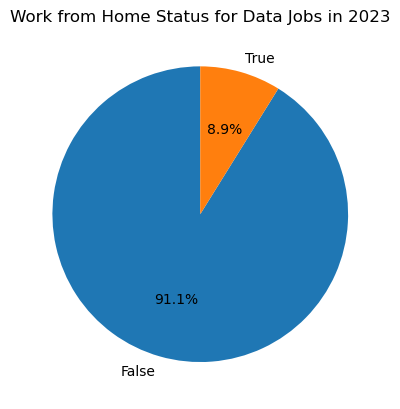

In [11]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.title('Work from Home Status for Data Jobs in 2023')
plt.ylabel('')
plt.show()

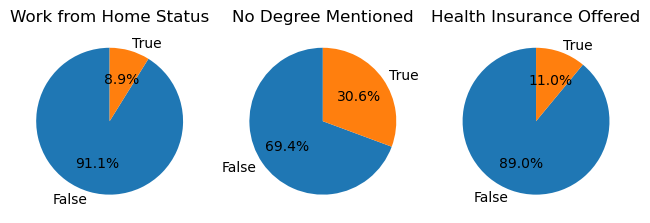

In [32]:
dict_cols = {
    'job_work_from_home': 'Work from Home Status',
    'job_no_degree_mention': 'No Degree Mentioned',
    'job_health_insurance': 'Health Insurance Offered' }

fig, ax = plt.subplots(1,3)

for i, (col, title) in enumerate(dict_cols.items()):
    df[col].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%', ax=ax[i])
    ax[i].set_ylabel('')
    ax[i].set_title(title)

#fig.suptitle('Data Job Work Offering in 2023', fontsize=16)
plt.tight_layout()
plt.show()